In [1]:
# Magic Commands
%matplotlib inline

# Third-Party Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Matplotlib Default Configuration
mpl.rc('axes', titlesize=8)
mpl.rc('grid', linestyle=':')

In [3]:
# Constants
FIG_WIDTH, FIG_HEIGHT = 11, 4

# Machine Learning Fundamentals

## Classification

/Users/sascha/.local/share/virtualenvs/laboratory-LAollfle/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


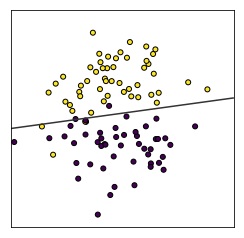

In [4]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=1000)
xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

clf = LogisticRegression().fit(X, y)
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

ax.set_xticks([])
ax.set_yticks([])
    
plt.savefig('../slides/figures/classification-task.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

## Regression

/Users/sascha/.local/share/virtualenvs/laboratory-LAollfle/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


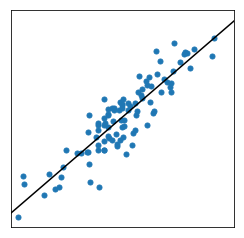

In [5]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

X, y = make_regression(n_features=1, n_informative=1, noise=2, random_state=9)
xx = np.expand_dims(np.linspace(-4, 4, 100), 2)

clf = LinearRegression().fit(X, y)
preds = clf.predict(xx)

ax.scatter(X, y, marker='o', s=25)
ax.plot(xx, preds, c='k')

ax.set_xlim(-3, 3)
ax.set_ylim(-12, 12)
ax.set_xticks([])
ax.set_yticks([])
    
plt.savefig('../slides/figures/regression-task.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

## Anomaly Detection

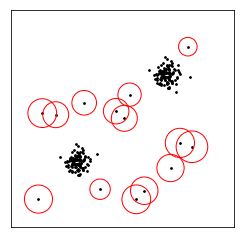

In [6]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

ax.scatter(X[:, 0], X[:, 1], color='k', s=3.)
ax.scatter(X[radius > 0.2, 0], X[radius > 0.2, 1], s=1000 * radius[radius > 0.2], edgecolors='r', facecolors='none')

ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('../slides/figures/anomaly-detection-task.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

## Clustering

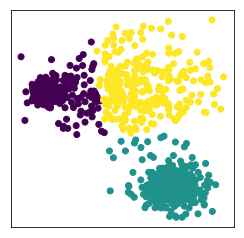

In [7]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

X, y = make_blobs(n_samples=1000, cluster_std=[1.0, 2.5, 0.5], random_state=1909)
preds = KMeans(n_clusters=3, random_state=1909).fit_predict(X)

ax.scatter(X[:, 0], X[:, 1], c=preds)

ax.set_xticks([])
ax.set_yticks([])

plt.savefig('../slides/figures/clustering-task.pdf', transparent=True, bbox_inches='tight', pad_inches=0)